# 2. laboratorijska vježba
## Električni filtri
Općenito, filtar u domeni elektromagnetske kompatibilnosti i kroz ovaj laboratorij razmatramo kao model električnog kruga definiranog koristeći koncentrirane parametre. Filtar signal s ulaza oblikuje na način da komponente signala na određenim frekvencijama propušta bez izobličenja (u teoriji), dok na drugim frekvencijama komponente ne propušta (u teoriji, u stvarnosti dolazi do jače ili slabije atenuacije). Selektivno propuštanje signala se radi ponajprije kako bi se potisnule ili u potpunosti otklonile neželjene komponente signala.

S obzirom na frekvencijski pojas propusta, filtre dijelimo u 4 osnovne kategorije:
1. nisko-propusni filtri - propuštaju se sve frekvencije signala ispod tzv. *cut-off* frekvencije;
2. visoko-propusni filtri - propuštaju se sve frekvencije signala iznad *cut-off* frekvencije;
3. pojasno-propusni filtri - propušta se određeni frekvencijski pojas;
4. pojasno-nepropusni filtri - ne propušta se određeni frekvencijski pojas.

S obzirom na tip koncentriranih parametara, odnosno komponenti koje koristimo kako bismo računalno modelirali rad filtra, filtre dijelimo na dodatne 2 kategorije:
1. aktivni filtri - realizirani uz pomoć aktivnih komponenti (tranzistori i operacijska pojačala);
2. pasivni filtri - realizirani uz pomoć pasivnih komponenti (otpornici, kondenzatori i zavojnice).

### Pasivni nisko-propusni filtar
Realizacija nisko-propusnog filtra u ovom slučaju se ostvaruje korištenjem otpornika i kondenzatora povezanih u seriju, pri čemu se izlaz promatra kao napon na kondenzatoru, $V_{out}$. Uz pretpostavku da je signal na ulazu, $V_{in}$, sinusoidalni naponski izvor, analizu možemo prebaciti u frekvencijsku domenu koristeći impedancijski model. Na ovaj način izbjegavamo potrebu za korištenjem diferencijalnog računa i čitav proračun se svodi na jednostavni algebarski problem. 

<img src="static/rc-lowpass.png" alt="simple-rc-lowpass" width="300"/>

Napon na kondenzatoru, $V_{out}$, definiramo kroz podjelu ulaznog napona na sljedeći način:

$$
\begin{align}
    V_{out} &= \frac{Z_c}{Z_c + Z_r} \cdot V_{in} \\
    \frac{V_{out}}{V_{in}} &= \frac{Z_c}{Z_c + Z_r} = \frac{1/(j\omega C)}{1/(j\omega C) + R} = \frac{1}{1 + j\omega C R}
\end{align}
$$

Dobiveni odnos izlaznog i ulaznog napona se naziva **funkcija prijenosnog odziva**, $H$, u stacionarnom stanju:

$$
H(\omega) = \frac{V_{out}}{V_{in}} = \frac{1}{1 + j\omega C R}
$$

Kako je $H$ funkcija frekvencije, imamo dva ruba slučaja:
* za iznimno niske frekvencije kada je $\omega \sim 0$ slijedi da je $H(\omega) = 1$;
* za iznimno visoke frekvencije kada $\omega \rightarrow \infty$ slijedi da je $H(\omega) \rightarrow 0$.

Potrebno je dodatno definirati već spomenutu *cut-off* frekvenciju, $f_c$, za koju amplituda funkcije frekvencijskog odziva, $H$, pada za $\sqrt 2$ puta, odnosno za $3$ dB:
$$
\begin{align}
    \frac{H(\omega)}{\sqrt 2} &= \frac{1}{1 + j\omega_c C R} \\
    \omega_c &= \frac{1}{CR} \\
    f_c &= \frac{1}{2\pi CR}
\end{align}
$$

Link za interaktivni rad s pasivnim nisko-propusnim filtrom: http://sim.okawa-denshi.jp/en/CRtool.php

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def rc_lowpass(R, C, f):
    return 1/(1+2j*np.pi*f*C*R)

In [3]:
R = 4.5e3
C = 7.0e-6
f = np.linspace(0, 100, 10000)
omega = 2*np.pi*f
f_cutoff = 1/(2*np.pi*R*C)
omega_cutoff = f_cutoff*2*np.pi

print(f'R = {R/1000} kΩ')
print(f'C = {C*10**6} µF')
print(f'frequency range = [{f.min()}-{f.max()}] Hz')
print(f'frequency cut-off = {round(f_cutoff, 1)} Hz')

R = 4.5 kΩ
C = 7.0 µF
frequency range = [0.0-100.0] Hz
frequency cut-off = 5.1 Hz


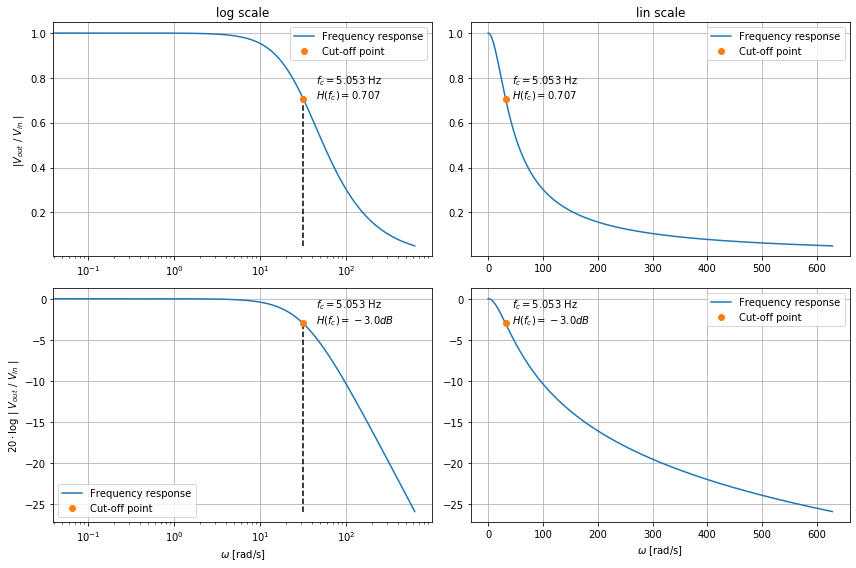

In [4]:
H = np.abs(rc_lowpass(R, C, f))
H_db = 20*np.log10(H)

### visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

## absolutue value of frequency response function
# shown in log scale
ax[0,0].plot(omega, H, label='Frequency response')
ax[0,0].plot(omega_cutoff, 1/np.sqrt(2), 'o', label='Cut-off point')
ax[0,0].vlines(omega_cutoff, H.min(), 1/np.sqrt(2), linestyle='--')
ax[0,0].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(1/np.sqrt(2), 3)}$', (omega_cutoff*1.4, 1/np.sqrt(2)))
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel('$| V_{out}$ / $V_{in}$ |')
ax[0,0].set_title('log scale')
ax[0,0].legend()
ax[0,0].grid()
# shown in lin scale
ax[0,1].plot(omega, H, label='Frequency response')
ax[0,1].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(1/np.sqrt(2), 3)}$', (omega_cutoff*1.4, 1/np.sqrt(2)))
ax[0,1].plot(omega_cutoff, 1/np.sqrt(2), 'o', label='Cut-off point')
ax[0,1].set_title('lin scale')
ax[0,1].legend()
ax[0,1].grid()
## frequency response function in dB
# shown in log scale
ax[1,0].plot(omega, H_db, label='Frequency response')
ax[1,0].vlines(omega_cutoff, H_db.min(), H_db.max()-3, linestyle='--')
ax[1,0].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(H_db.max()-3, 3)} dB$', (omega_cutoff*1.4, H_db.max()-3))
ax[1,0].plot(omega_cutoff, H_db.max()-3, 'o', label='Cut-off point')
ax[1,0].set_xscale('log')
ax[1,0].set_xlabel('$\\omega$ [rad/s]')
ax[1,0].set_ylabel('$20 \\cdot \\log$ | $V_{out}$ / $V_{in}$ |')
ax[1,0].legend()
ax[1,0].grid()
# shown in lin scale
ax[1,1].plot(omega, H_db, label='Frequency response')
ax[1,1].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(H_db.max()-3, 3)} dB$', (omega_cutoff*1.4, H_db.max()-3))
ax[1,1].plot(omega_cutoff, H_db.max()-3, 'o', label='Cut-off point')
ax[1,1].set_xlabel('$\\omega$ [rad/s]')
ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()
plt.show()

### Butterworthov filtar
Butterworthov filtar vrsta je filtra za obradu signala dizajnirana tako da je frekvencijski odziv što je moguće ravniji u propusnom opsegu. 

<img src="static/butterworth-lowpass.png" alt="butterworth" width="500"/>

Funkcija prijenosnog odziva, $H$, niskopropusnog Butterworth filtra trećeg reda (Cauer, ljestvasta topologija), prikazanog na slici poviše, ima sljedeći oblik:

$$H(s) = \frac{V_o(s)}{V_i(s)} = \frac{R_4}{s^3(L_1 C_2 L_3) + s^2(L_1 C_2 R_4) + s(L_1 + L_3) + R_4}$$

Ukoliko zadržimo istu *cut-off* frekvenciju kao i u prvom primjeru, funkcija Butterworthovog filtra će, kao glavnu prednost, imati puno strmiju granicu propusnog i nepropusnog frekvencijskog područja (ovisno o redu filtra).

In [5]:
from scipy.signal import (butter, freqz)

In [6]:
sample_rate = 1000
order = 3
nyq = 0.5 * sample_rate
f_cutoff_norm = f_cutoff / nyq
b, a = butter(N=order, Wn=f_cutoff_norm, btype='low', analog=False, output='ba')
w, h = freqz(b, a, worN=f.size)  # w is normalized to [0, pi)
f = w / np.pi * nyq  # de-normalized frequencies

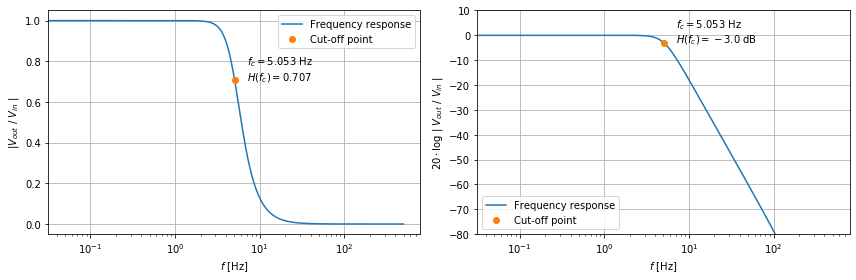

In [7]:
H = np.abs(h)
H_db = 20*np.log10(H)

###visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

## absolutue value of frequency response function
ax[0].plot(f, H, label='Frequency response')
ax[0].plot(f_cutoff, 1/np.sqrt(2), linestyle='none', marker='o', label='Cut-off point')
ax[0].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(1/np.sqrt(2), 3)}$', (f_cutoff*1.4, 1/np.sqrt(2)))
ax[0].set_xscale('log')
ax[0].set_xlabel('$f$ [Hz]')
ax[0].set_ylabel('$| V_{out}$ / $V_{in}$ |')
ax[0].legend()
ax[0].grid()
## frequency response function in dB
ax[1].plot(f, H_db, label='Frequency response')
ax[1].plot(f_cutoff, H_db.max()-3, linestyle='none', marker='o', label='Cut-off point')
ax[1].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(H_db.max()-3, 3)}$ dB', (f_cutoff*1.4, H_db.max()-3))
ax[1].set_xscale('log')
ax[1].set_ylim(-80, 10)
ax[1].set_xlabel('$f$ [Hz]')
ax[1].set_ylabel('$20\cdot \log$ | $V_{out}$ / $V_{in}$ |')
ax[1].legend(loc='lower left')
ax[1].grid()
plt.tight_layout()
plt.show()

#### Demonstracija korištenja Butterworth filtra

In [8]:
from scipy.fft import (fft, ifft)
from scipy.fftpack import fftshift
from scipy.signal import lfilter

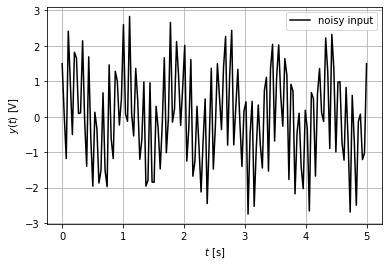

In [9]:
# generate dummy raw noisy data as the input in the filter
T = 5
fs = 30
N = T * fs
t = np.linspace(0, T, N)
noisy_input = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

plt.plot(t, noisy_input, 'k-', label='noisy input')
plt.xlabel('$t$ [s]')
plt.ylabel('$y(t)$ [V]')
plt.legend()
plt.grid()
plt.show()

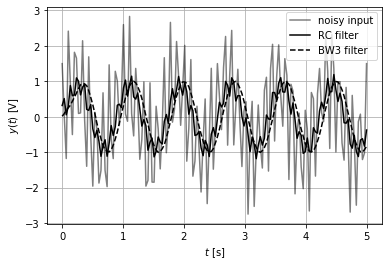

In [10]:
def lowpass_filter(noisy_input, f_cutoff, fs, order):
    f_cutoff_norm = f_cutoff / fs
    b, a = butter(order, f_cutoff_norm, btype='low', analog=False, output='ba')
    return lfilter(b, a, noisy_input)


plt.plot(t, noisy_input, color='k', alpha=0.5, label='noisy input')
plt.plot(t, lowpass_filter(noisy_input, f_cutoff, fs, 1), 'k-', label='RC filter')
plt.plot(t, lowpass_filter(noisy_input, f_cutoff, fs, 3), 'k--', label='BW3 filter')
plt.xlabel('$t$ [s]')
plt.ylabel('$y(t)$ [V]')
plt.legend()
plt.grid()
plt.show()